### **Sentiment Analysis for IMDB Dataset**

In [4]:
!pip install -q contractions

### **Dataset**

In [3]:
!gdown 1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy

Downloading...
From: https://drive.google.com/uc?id=1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy
To: d:\Project Sentiment Analysis\IMDB-Dataset.csv

  0%|          | 0.00/66.2M [00:00<?, ?B/s]
  1%|          | 524k/66.2M [00:00<01:02, 1.06MB/s]
  2%|▏         | 1.05M/66.2M [00:00<01:01, 1.06MB/s]
  2%|▏         | 1.57M/66.2M [00:01<01:00, 1.06MB/s]
  3%|▎         | 2.10M/66.2M [00:01<00:59, 1.07MB/s]
  4%|▍         | 2.62M/66.2M [00:02<00:58, 1.08MB/s]
  5%|▍         | 3.15M/66.2M [00:02<00:58, 1.08MB/s]
  6%|▌         | 3.67M/66.2M [00:03<00:57, 1.08MB/s]
  6%|▋         | 4.19M/66.2M [00:03<00:57, 1.09MB/s]
  7%|▋         | 4.72M/66.2M [00:04<00:57, 1.08MB/s]
  8%|▊         | 5.24M/66.2M [00:04<00:56, 1.08MB/s]
  9%|▊         | 5.77M/66.2M [00:05<00:56, 1.07MB/s]
 10%|▉         | 6.29M/66.2M [00:05<00:57, 1.03MB/s]
 10%|█         | 6.82M/66.2M [00:06<00:56, 1.05MB/s]
 11%|█         | 7.34M/66.2M [00:06<00:55, 1.07MB/s]
 12%|█▏        | 7.86M/66.2M [00:07<01:11, 812kB/s] 
 13%|█▎        | 8.39M/6

In [5]:
import pandas as pd 

df = pd.read_csv('IMDB-Dataset.csv')

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [9]:
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [10]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

### **Preprocessing**

In [11]:
# Select duplicate rows
duplicated_df = df[df.duplicated()]

In [12]:
duplicated_df

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [13]:
df = df.drop_duplicates()

In [14]:
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


### **Data Cleaning**

In [17]:
'no' in stopwords.words('english')

True

In [18]:
'no' in set([word for word in stopwords.words('english') if word not in ['no', 'not']])

False

In [16]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

stop = set([word for word in stopwords.words('english') if word not in ['no', 'not']])

# Expanding contractions
def expand_contractions(text):
    return contractions.fix(text)

# Function to clean data
def preprocess_text(text):

    wl = WordNetLemmatizer()

    soup = BeautifulSoup(text, "html.parser") # Removing html tags
    text = soup.get_text()
    text = expand_contractions(text) # Expanding chatwords and contracts clearing contractions
    emoji_clean = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    text = re.sub(r'\.(?=\S)', '. ',text) #add space after full stop
    text = re.sub(r'http\S+', '', text) #remove urls
    text = "".join([
        word.lower() for word in text if word not in string.punctuation
    ]) #remove punctuation and make text lowercase
    text = " ".join([
        wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()]) #lemmatize
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMIN/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\AMIN/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
wl = WordNetLemmatizer()
wl.lemmatize('loves')

'love'

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [22]:
preprocess_text(df['review'][0])

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust not show faint hearted timid show pull no punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy not high agenda city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show would not dare forget pretty picture painted mainstream audience forget charm forget romance oz not mess around first episode ever saw struck nasty surreal could not say ready watched developed taste oz got accustomed high level graphic violence not violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street s

In [23]:
df['review'] = df['review'].apply(preprocess_text)

C:\Users\AMIN\AppData\Local\Temp\ipykernel_21556\838385381.py:22: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser") # Removing html tags


In [24]:
df['review'][0]

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust not show faint hearted timid show pull no punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy not high agenda city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show would not dare forget pretty picture painted mainstream audience forget charm forget romance oz not mess around first episode ever saw struck nasty surreal could not say ready watched developed taste oz got accustomed high level graphic violence not violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street s

### **EDA**

In [27]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

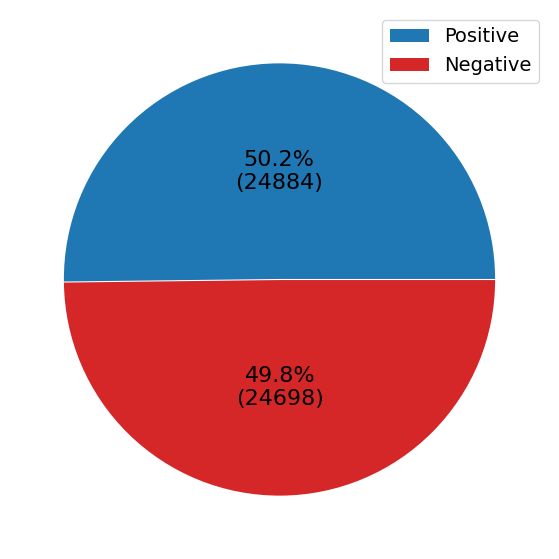

In [28]:
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]

labels = ['positive', 'negative']
# Create pie chart
pie, ax = plt.subplots(figsize=[11, 7])
plt.pie(x=data, autopct=lambda pct: func(pct, data), explode=[0.0025]*2, pctdistance=0.5, colors=[sns.color_palette()[0], 'tab:red'],textprops={'fontsize': 16})
# plt.title('Frequencies of sentiment labels', fontsize=14, fontweight='bold')
labels = [r'Positive', r'Negative']
plt.legend(labels, loc="best", prop={'size': 14})
pie.savefig("PieChart.png")
plt.show()

In [29]:
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

In [30]:
df_temp

,review,sentiment,words length
0,one reviewer mentioned watching oz episode hoo...,positive,169
1,wonderful little production filming technique ...,positive,86
2,thought wonderful way spend time hot summer we...,positive,86
3,basically family little boy jake think zombie ...,negative,64
4,petter matteis love time money visually stunni...,positive,127
...,...,...,...
49995,thought movie right good job not creative orig...,positive,80
49996,bad plot bad dialogue bad acting idiotic direc...,negative,56
49997,catholic taught parochial elementary school nu...,negative,117
49998,going disagree previous comment side maltin on...,negative,113


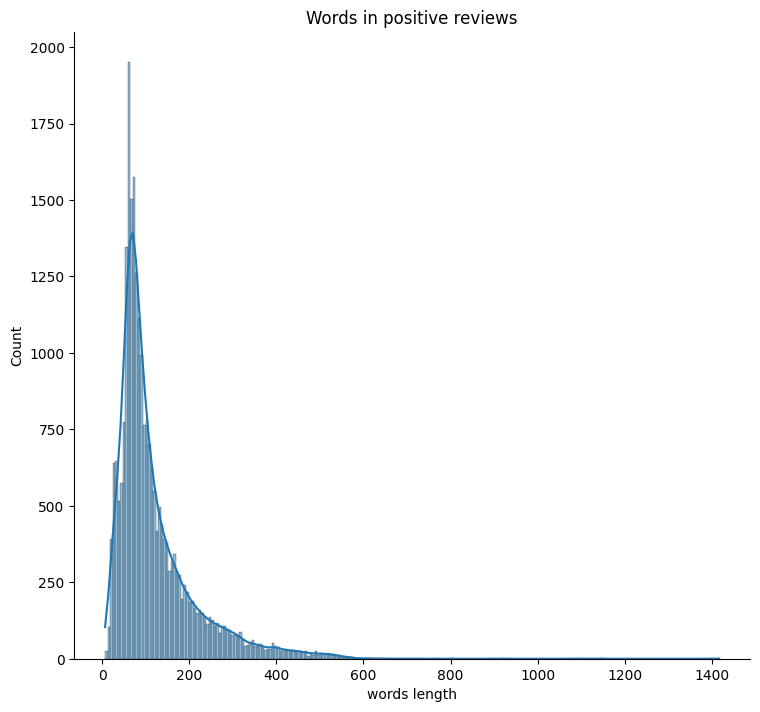

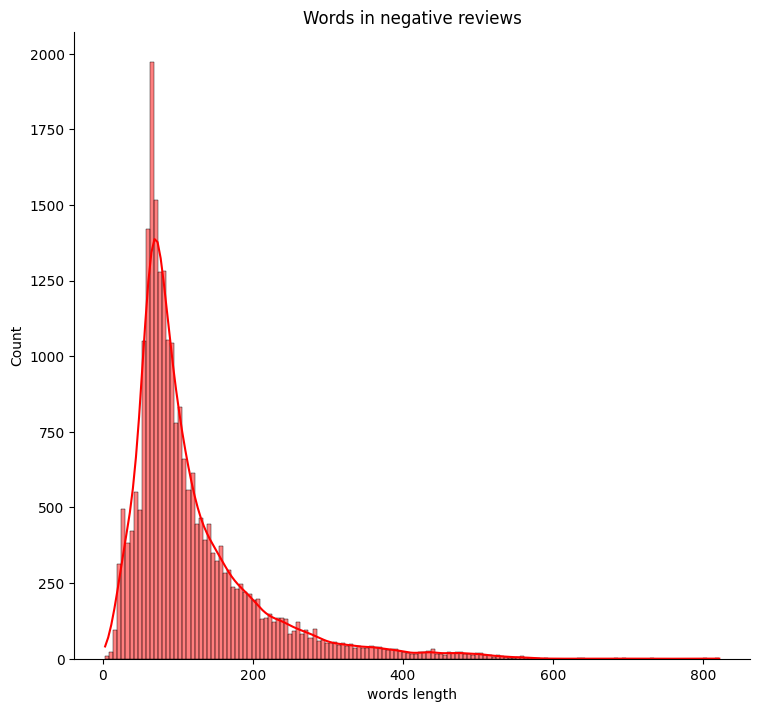

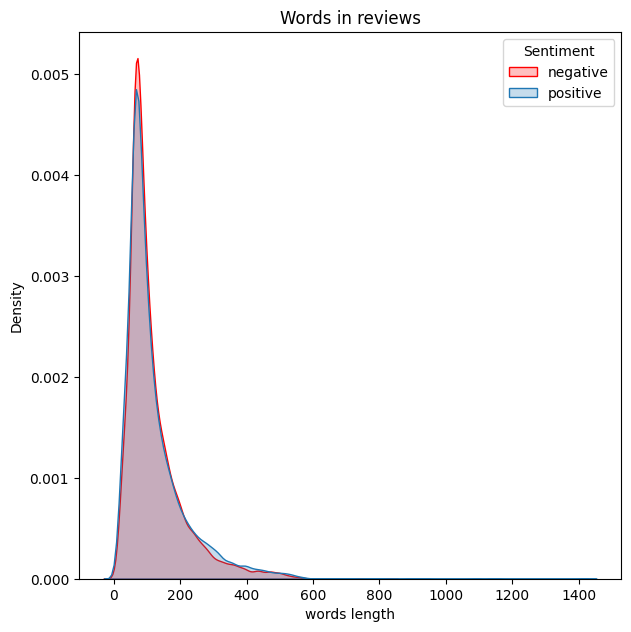

In [31]:
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

hist_positive = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'positive'],
    x="words length", hue="sentiment", kde=True,  height=7, aspect=1.1, legend=False
).set(title='Words in positive reviews')
plt.show(hist_positive)

hist_negative = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'negative'],
    x="words length", hue="sentiment", kde=True,  height=7, aspect=1.1, legend=False,  palette=['red']
).set(title='Words in negative reviews')
plt.show(hist_negative)

plt.figure(figsize=(7,7.1))
kernel_distibution_number_words_plot  = sns.kdeplot(
    data=df_temp, x="words length", hue="sentiment", fill=True,  palette=[sns.color_palette()[0],'red']
).set(title='Words in reviews')
plt.legend(title='Sentiment', labels=['negative', 'positive'])
plt.show(kernel_distibution_number_words_plot)

C:\Users\AMIN\AppData\Local\Temp\ipykernel_21556\1114091667.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


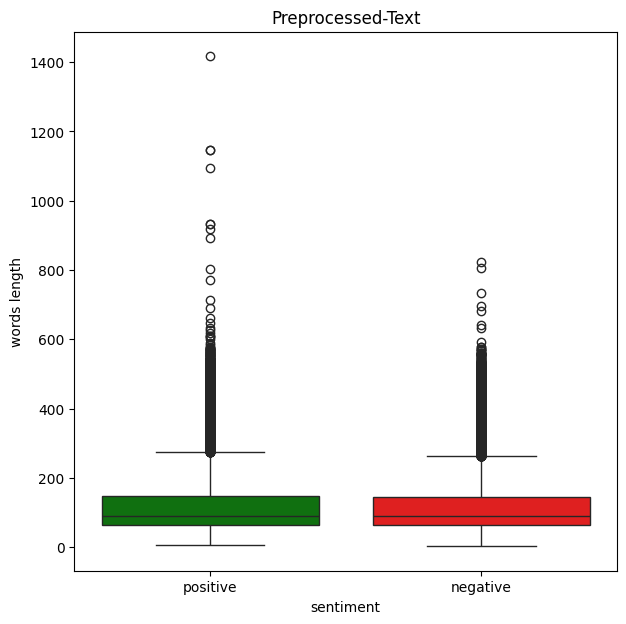

In [32]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(
    x="sentiment", y='words length', data=df_temp, palette=['green','red'], ax=ax
)
ax.set_title('Preprocessed-Text')
ax.legend([],[], frameon=False)  

plt.show()

In [33]:
from collections import Counter
words = ' '.join(df['review']).split()
counter = Counter(words)
most = counter.most_common()
vocabs, word_counts = [], []
for word, count in most:
    if (word not in stop) :
        vocabs.append(word)
        word_counts.append(count)

In [34]:
most[:10]

[('not', 119179),
 ('movie', 100605),
 ('film', 91130),
 ('one', 53525),
 ('like', 39746),
 ('would', 30811),
 ('time', 30091),
 ('good', 28905),
 ('character', 27801),
 ('story', 24600)]

Text(0.5, 1.0, 'Most Common Word In Job Description')

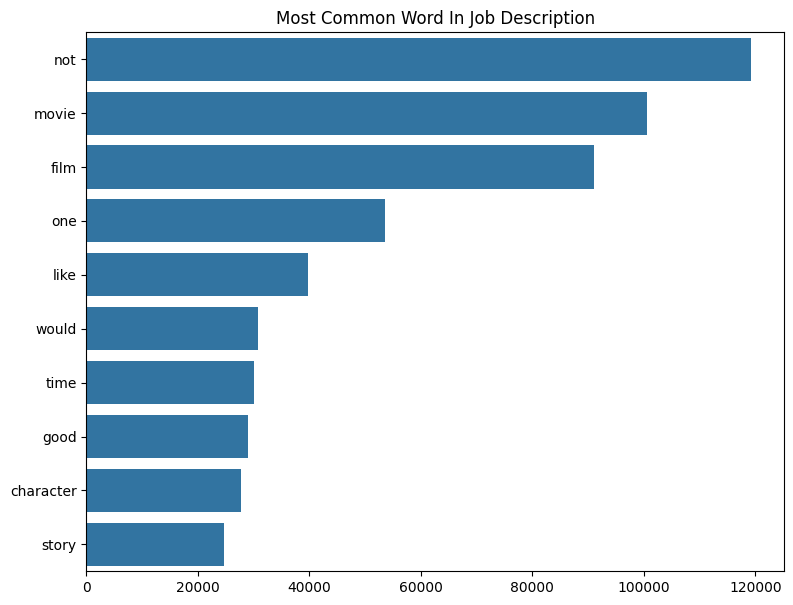

In [35]:
plt.figure(figsize=(9,7))
sns.barplot(x=word_counts[:10],y=vocabs[:10])
plt.title("Most Common Word In Job Description")

In [36]:
word_count_df = pd.DataFrame({
    'word': vocabs,
    'word_count': word_counts
})

In [37]:
word_count_df

,word,word_count
0,not,119179
1,movie,100605
2,film,91130
3,one,53525
4,like,39746
...,...,...
143139,ohsohard,1
143140,effortful,1
143141,frenchonly,1
143142,clatter,1


### **Text Encoding**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [39]:
x_data = df['review']

In [40]:
x_data[:5]

0    one reviewer mentioned watching oz episode hoo...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake think zombie ...
4    petter matteis love time money visually stunni...
Name: review, dtype: object

In [41]:
label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])

In [42]:
y_data[:5]

array([1, 1, 1, 0, 1])

In [43]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42
)

In [44]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_vectorizer.fit(x_train, y_train)

TfidfVectorizer(max_features=5000)

In [45]:
x_train_encoded = tfidf_vectorizer.transform(x_train)
x_test_encoded = tfidf_vectorizer.transform(x_test)

In [46]:
x_train_encoded.shape

(39665, 5000)

### **Classifier**

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier  


### **Decision Tree**

In [48]:
dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    criterion='entropy',
    random_state=42
)
dt_classifier.fit(x_train_encoded, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [49]:
y_pred = dt_classifier.predict(x_test_encoded)

In [50]:
accuracy_score(y_pred, y_test)

0.6808510638297872

In [53]:
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
dt_classifier.fit(x_train_encoded, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [55]:
y_pred = dt_classifier.predict(x_test_encoded)

In [56]:
accuracy_score(y_pred, y_test)

0.7154381365332257

### **Random Forest**

In [57]:
rf_classifier = RandomForestClassifier(
    n_estimators=100, max_depth=5, max_features='sqrt', bootstrap=True, random_state=42
)
rf_classifier.fit(x_train_encoded, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [58]:
y_pred = rf_classifier.predict(x_test_encoded)

In [59]:
accuracy_score(y_pred, y_test)

0.8064938993647273

In [60]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [61]:
y_pred = rf_classifier.predict(x_test_encoded)

In [62]:
accuracy_score(y_pred, y_test)

0.8394675809216497

### **AdaBoost**

In [63]:
adb_classifier = AdaBoostClassifier(
    n_estimators=100, random_state=42
)
adb_classifier.fit(x_train_encoded, y_train)

C:\Users\AMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

In [64]:
y_pred = adb_classifier.predict(x_test_encoded)

In [65]:
accuracy_score(y_pred, y_test)

0.8254512453362912

### **Gradient Boosting**

In [66]:
gb_classifier = GradientBoostingClassifier(
    n_estimators=100, random_state=42
)
gb_classifier.fit(x_train_encoded, y_train)

GradientBoostingClassifier(random_state=42)

In [67]:
y_pred = gb_classifier.predict(x_test_encoded)

In [68]:
accuracy_score(y_pred, y_test)

0.8019562367651507

### **XGBoost**

In [69]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(n_estimators=100)
xgb_classifier.fit(x_train_encoded, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
y_pred = xgb_classifier.predict(x_test_encoded)

In [71]:
accuracy_score(y_pred, y_test)

0.8509629928405767

### **Inference**

In [72]:
df['review'][:2]

0    one reviewer mentioned watching oz episode hoo...
1    wonderful little production filming technique ...
Name: review, dtype: object

In [73]:
example_encoded = tfidf_vectorizer.transform(df['review'][:2])

In [74]:
example_encoded.shape

(2, 5000)

In [75]:
example_pred = dt_classifier.predict(example_encoded)

In [76]:
example_pred

array([1, 1])

In [77]:
label_encode.classes_

array(['negative', 'positive'], dtype=object)

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "a very good movie. ",
]
vectorizer = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
vectorizer.fit(corpus)
vectorizer.get_feature_names_out()

array(['a', 'good', 'movie', 'very'], dtype=object)

In [79]:
vectorizer.fit_transform(corpus).toarray()

array([[1, 1, 1, 1]], dtype=int64)